#Week 3 PRA3024 Assignment
#Michail-Georgios Papachristos
#i6166863

In the following assignment, a code to compute the fisher matrix of some observables for a specific inputed waveform was programmed. Through the computed Fisher-Matrix, the standard deviation for each of the observables was calculated. The waveform h(f) was retrieved from the reaserch paper:"Parameter estimation of inspiralling compact binaries using 3.5 post-Newtonian gravitational wave phasing: The non-spinning case" with the Power Spectral Density S(f) of the Advanced LIGO being used. Furthermore, the Fisher-Matrix of another waveform h(f) which was retrieved from the bachelor thesis of Lizzy Reith was calculated and the Power Spectral Densities S(f) of both the Advanced LIGO and the Einstein Telescope were used. It should be mentioned that the data of the Power Spectral Densities were obtained from ELEUM.

First, a code that calculates the Fisher Matrix for every waveform and Power Spectral Density needs to be made. The Fisher Matrix is defined as:

![alt text](https://drive.google.com/uc?id=16LiFj3wAndmIEgBguu4ZRWk4SmUoZAJJ)

where h is the waveform and S(f) the Power Spectral Density.

The necessary packages are imported first:

In [0]:
import math
import numpy as np
import sympy as sympy
from sympy import *
from sympy import integrate 
from sympy import symbols, Derivative, log
from sympy.utilities.lambdify import lambdify
import scipy.integrate as integrate
from numpy.linalg import inv
import matplotlib.pyplot as plt


#Exercise 1: Writing a vanilla Fisher Matrix Code.

 The waveform in the research paper is defined as:

![alt text](https://drive.google.com/uc?id=1pQ5TeTqcymKLuzHX6PrhgDRt5zzxITZ-)

where:

![alt text](https://drive.google.com/uc?id=1aKWs9nWbPnidBiY9c7tHLx_tZWDEbFdL)

and SNR(Signal Noise Ratio) = 10.
Furthermore, 

![alt text](https://drive.google.com/uc?id=1LpaQmQF0WfAaBNP1DHcBwdgINHqNSy87)

with:

![alt text](https://drive.google.com/uc?id=1TKn8phU6YwLFyhRH4tOnNr-i1oIZF2H0)

and:

![alt text](https://drive.google.com/uc?id=1MdY8RU7TcwsF0rvHiw8Pkmzyp4II9e4W)

It should be mentioned that the upper frequency is given by the equation:

![alt text](https://drive.google.com/uc?id=1KJoQ88TCVQVzHK-0ABkMvbCfESm7FYAz)

where M = 2 * 10^30 yields fu = 4374.05439771

The data for the Power Spectral Density S(f) for the advanced LIGO was retrieved from ELEUM and from that a scatter plot was made in excel. The 5th order polynomial trendline of the scatter plot was used as the function for the Power Spectral Density. The scatter plot and the trendline are shown in the picture below:

![alt text](https://drive.google.com/uc?id=10zT7o0fqn2O9yG6Hrf3V4KjkZfwTk9ha)

A function is made for the Power Spectral Density in the following code:

In [0]:
#Inputs the Power Spectral Density function for AdvancedLIGO.
def S(f):
  fs = 9
  fu = 4374.05439771
  return -(8*(10**(-40))*f**5) + ((2*10**(-35))*f**4) - ((10**(-31))*f**3) + ((3*10**(-28))*f**2) - ((4*10**(-25))*f) + 10**(-22)   

The constant A can be calculated through the following code:

In [3]:
#fs and fu are used as lower and upper bound of integral.
fs = 9
fu = 4374.05439771

#Calculates the integral required to calculate A.
result = integrate.fixed_quad(lambda f: f**(-7/6)/S(f),fs,fu)

#Calculates A.
Asqr = 10/(4*result[0])
A = math.sqrt(Asqr)
print("A =",A)

A = 8.189424722447416e-12


Furthermore, a function for the waveform h(f) is made with the 4 observables being tc,φc,Mc,ηc in the following code. It should be mentioned that ηc refers to the dimensionless mass ratio ηc = m1*m2/((m1+m2)^2) and Mc refers to the chirm mass where Mc = (ηc^(3/5))*(m1+m2):

In [0]:
#Inputs the waveform h(f) as a function of h(tc,φc,Mc,ηc,f) which are the 4 observables.
def h(tc,φc,Mc,ηc,f):
      A = 8.189424722447416*10**(-12)
      υl = 1
      υ = ((3.14*(Mc/ηc**(3/5))*f*6.67408*10**(-11))/2.69440024*10**25)**(1/3)
      k = log((υ/υl),10)
      γ = 0.57721
      λ = -0.6451
      θ = -1.28
      a2 = (4.91402116+6.1111*ηc)
      a4 = (30.103153+(53.859127*ηc)+(42.847222*(ηc**2)))
      #a5 = 3.14*(51.1177249+(153.353175*k)-7.222*η(1+3*(math.log(k,10))))
      #a6 = 2467.55412-(213.333*(3.14**2))-(326.095238*(γ)) + η*(-5031.0472+187.916667*(3.14**2)-586.666*θ +1368.888*λ) + 44.013318*(η**2) - 98.6304*(η**3) - 326.095238*log(4*υ,10)
      #a7 = 3.14*(303.511098+250.340608*η-97.9431217*(n**2))    
      return A*(f**(-7/6))*2.71828183**(1j*ψ(tc,φc,Mc,ηc,f))

#The ψ(f) part of the function is also made into a function and is called in the h(f) function.
def ψ(tc,φc,Mc,ηc,f):
  υ = ((3.14*(Mc/ηc**(3/5))*f*6.67408*10**(-11))/2.69440024*10**25)**(1/3)
  a2 = (4.91402116+6.1111*ηc)
  a4 = (30.103153+(53.859127*ηc)+(42.847222*(ηc**2)))
  return (2*3.14*f*tc) - φc - (3.14/4) + (3/(128*ηc*(υ**5)))*(1+a2*(υ**2)-16*3.14*(υ**3)+a4*(υ**4))

#Transforms these observables into instances of the Symbol class of the Sympy package required for the derivatives later. 
tc,φc,Mc,ηc,f = symbols('tc φc Mc f ηc')

The following code makes use of the sympy library to differentiate the waveform in terms of the 4 observables being used. Afterwards the 4 observables are set to tc = 1,φc = 1,Mc = 8.7055056*10^29 and ηc = 0.25 respectivelly. This way an expression in terms of f is produced for each observable.

In [5]:
A = 8.189424722447416*10**(-12)   
υl = 1     
υ = ((3.14*(Mc/ηc**(3/5))*f*6.67408*10**(-11))/2.69440024*10**25)**(1/3)
k = log((υ/υl),10)
γ = 0.57721
λ = -0.6451
θ = -1.28
a2 = (4.91402116+6.1111*ηc)
a4 = (30.103153+(53.859127*ηc)+(42.847222*(ηc**2)))
#a5 = 3.14*(51.1177249+(153.353175*k)-7.222*η(1+3*(math.log(k,10))))
#a6 = 2467.55412-(213.333*(3.14**2))-(326.095238*(γ)) + η*(-5031.0472+187.916667*(3.14**2)-586.666*θ +1368.888*λ) + 44.013318*(η**2) - 98.6304*(η**3) - 326.095238*log(4*υ,10)
#a7 = 3.14*(303.511098+250.340608*η-97.9431217*(n**2))  

#The Sympy package is used to differentiate the h function in terms of each observable and then lambdify is used to convert the sympy expression to a lambda function.
func_tc = lambdify(tc,(diff(h(tc,1,8.7055056*10**29,0.25,f),tc)))
func_φc = lambdify(φc,(diff(h(1,φc,8.7055056*10**29,0.25,f),φc)))
func_Mc = lambdify(Mc,(diff(h(1,1,Mc,0.25,f),Mc)))
func_ηc = lambdify(ηc,(diff(h(1,1,8.7055056*10**29,ηc,f),ηc)))

#Prints the obtained functions for each observable.
print("The expressions that are obtained for each observable are: ")
print("func_tc =",func_tc(1))
print("func_φc =",func_φc(1))
print("func_Mc =",func_Mc(8.7055056*10**29))
print("func_ηc =",func_ηc(0.25))

The expressions that are obtained for each observable are: 
func_tc = 5.14295872861245e-11*2.71828183**(1.0*I*(4.48906995863138e-77*ηc**(-1.66666666666667)*(8.64834366807869e+30*ηc**0.666666666666667 - 7.81517257214614e+46*ηc**1.0 + 8.3353727856519e+61*ηc**1.33333333333333 + 1) + 6.28*ηc - 1.785))*I*ηc**(-0.166666666666667)
func_φc = -8.18942472708988e-12*2.71828183**(1.0*I*(4.48906995863138e-77*ηc**(-1.66666666666667)*(8.64834366807869e+30*ηc**0.666666666666667 - 7.81517257214614e+46*ηc**1.0 + 8.3353727856519e+61*ηc**1.33333333333333 + 1) + 6.28*ηc - 1.785))*I*ηc**(-1.16666666666667)
func_Mc = 8.18942472708988e-12*2.71828183**(1.0*I*(4.4890699586303e-77*ηc**(-1.66666666666667)*(8.64834366807889e+30*ηc**0.666666666666667 - 7.81517257214617e+46*ηc**1.0 + 8.33537278564996e+61*ηc**1.33333333333333 + 1) + 6.28*ηc - 1.785))*I*ηc**(-1.16666666666667)*(4.4890699586303e-77*ηc**(-1.66666666666667)*(6.62289212172343*ηc**0.666666666666667 - 8.97727591163249e+16*ηc**1.0 + 1.27664387245545e+32*ηc**

The code below is used to carry out the integration required to produce the Fisher-Matrix through the scimpy library.

In [6]:
#The obtained expressions are copied into functions.
def tc_func(f):
  return 5.14295872861245e-11*2.71828183**(1.0*I*(4.48906995863138e-77*f**(-1.66666666666667)*(8.64834366807869e+30*f**0.666666666666667 - 7.81517257214614e+46*f**1.0 + 8.3353727856519e+61*f**1.33333333333333 + 1) + 6.28*f - 1.785))*I*f**(-0.166666666666667)

def φc_func(f):
  return -8.18942472708988e-12*2.71828183**(1.0*I*(4.48906995863138e-77*f**(-1.66666666666667)*(8.64834366807869e+30*f**0.666666666666667 - 7.81517257214614e+46*f**1.0 + 8.3353727856519e+61*f**1.33333333333333 + 1) + 6.28*f - 1.785))*I*f**(-1.16666666666667)

def Mc_func(f):
  return 8.18942472708988e-12*2.71828183**(1.0*I*(4.4890699586303e-77*f**(-1.66666666666667)*(8.64834366807889e+30*f**0.666666666666667 - 7.81517257214617e+46*f**1.0 + 8.33537278564996e+61*f**1.33333333333333 + 1) + 6.28*f - 1.785))*I*f**(-1.16666666666667)*(4.4890699586303e-77*f**(-1.66666666666667)*(6.62289212172343*f**0.666666666666667 - 8.97727591163249e+16*f**1.0 + 1.27664387245545e+32*f**1.33333333333333) - 8.59431216078228e-107*f**(-1.66666666666667)*(8.64834366807889e+30*f**0.666666666666667 - 7.81517257214617e+46*f**1.0 + 8.33537278564996e+61*f**1.33333333333333 + 1))

def ηc_func(f):
  return 3.67629005208521e-88*2.71828183**(1.0*I*(4.48906995863137e-77*f**(-1.66666666666667)*(8.64834366807869e+30*f**0.666666666666667 - 7.81517257214614e+46*f**1.0 + 8.33537278565187e+61*f**1.33333333333333 + 1) + 6.28*f - 1.785))*I*f**(-2.83333333333334)*(-5.63297772219907e+30*f**0.666666666666667 + 1.87564141731507e+47*f**1.0 - 1.31042089863386e+62*f**1.33333333333333)
  
#Defines a 2-d array with 4 rows and columns.  
matrix = [[0 for x in range(4)] for y in range(4)]

#The scimpi library is used to compute the integrals and calculate the Fisher-Matrix.
for i in (0,1,2,3):
  for j in (0,1,2,3):
    if i == 0 and j == 0:
      matrix[0][0] = integrate.fixed_quad(lambda f: 4*(tc_func(f))*(tc_func(f).conjugate())/S(f),fs,fu)[0]
    elif i == 1 and j == 1:
      matrix[1][1] = integrate.fixed_quad(lambda f: 4*(φc_func(f))*(φc_func(f).conjugate())/S(f),fs,fu)[0]
    elif i == 2 and j == 2:
      matrix[2][2] = integrate.fixed_quad(lambda f: 4*(Mc_func(f))*(Mc_func(f).conjugate())/S(f),fs,fu)[0]
    elif i == 3 and j == 3:
      matrix[3][3] = integrate.fixed_quad(lambda f: 4*(ηc_func(f))*(ηc_func(f).conjugate())/S(f),fs,fu)[0]
    elif i == 1 and j == 0:
      matrix[1][0] = integrate.fixed_quad(lambda f: 4*(φc_func(f))*(tc_func(f).conjugate())/S(f),fs,fu)[0]
    elif i == 2 and j == 0:
      matrix[2][0] = integrate.fixed_quad(lambda f: 4*(Mc_func(f))*(tc_func(f).conjugate())/S(f),fs,fu)[0]
    elif i == 3 and j == 0:
      matrix[3][0] = integrate.fixed_quad(lambda f: 4*(ηc_func(f))*(tc_func(f).conjugate())/S(f),fs,fu)[0]
    elif i == 0 and j == 1:
      matrix[0][1] = integrate.fixed_quad(lambda f: 4*(tc_func(f))*(φc_func(f).conjugate())/S(f),fs,fu)[0]
    elif i == 2 and j == 1:
      matrix[2][1] = integrate.fixed_quad(lambda f: 4*(Mc_func(f))*(φc_func(f).conjugate())/S(f),fs,fu)[0]
    elif i == 3 and j == 1:
      matrix[3][1] = integrate.fixed_quad(lambda f: 4*(ηc_func(f))*(φc_func(f).conjugate())/S(f),fs,fu)[0]
    elif i == 0 and j == 2:
      matrix[0][2] = integrate.fixed_quad(lambda f: 4*(tc_func(f))*(Mc_func(f).conjugate())/S(f),fs,fu)[0]
    elif i == 1 and j == 2:
      matrix[1][2] = integrate.fixed_quad(lambda f: 4*(φc_func(f))*(Mc_func(f).conjugate())/S(f),fs,fu)[0]
    elif i == 3 and j == 2:
      matrix[3][2] = integrate.fixed_quad(lambda f: 4*(ηc_func(f))*(Mc_func(f).conjugate())/S(f),fs,fu)[0]
    elif i == 0 and j == 3:
      matrix[0][3] = integrate.fixed_quad(lambda f: 4*(tc_func(f))*(ηc_func(f).conjugate())/S(f),fs,fu)[0]
    elif i == 1 and j == 3:
      matrix[1][3] = integrate.fixed_quad(lambda f: 4*(φc_func(f))*(ηc_func(f).conjugate())/S(f),fs,fu)[0] 
    elif i == 2 and j == 3:
      matrix[2][3] = integrate.fixed_quad(lambda f: 4*(Mc_func(f))*(ηc_func(f).conjugate())/S(f),fs,fu)[0]

print("Fisher-Matrix = ",matrix) 


Fisher-Matrix =  [[52607.4482376717, -25.2011457054598, -5.94274391592041e-45, -2.43999003658711e-14], [-25.2011457054598, 0.0184547387882405, 4.43271976950671e-48, 1.81999968795626e-17], [-5.94274391592041e-45, 4.43271976950671e-48, 1.06438084354735e-93, 4.37016753562650e-63], [-2.43999003658711e-14, 1.81999968795626e-17, 4.37016753562650e-63, 1.79431679978315e-32]]


Afterwards, the numpy.linalg library is used to invert the fisher matrix.

In [7]:
#The Fisher-Matrix is copied and inverted through the numpy.linalg library.
invmat = np.linalg.inv([[52607.4482376717, -25.2011457054598, -5.94274391592041e-45, -2.43999003658711e-14], [-25.2011457054598, 0.0184547387882405, 4.43271976950671e-48, 1.81999968795626e-17], [-5.94274391592041e-45, 4.43271976950671e-48, 1.06438084354735e-93, 4.37016753562650e-63], [-2.43999003658711e-14, 1.81999968795626e-17, 4.37016753562650e-63, 1.79431679978315e-32]])

invmat

array([[ 1.82223736e-005, -1.42917945e+000,  4.32602249e+045,
         4.20434575e+014],
       [-1.42917945e+000, -6.14277686e+004,  1.83525654e+050,
         1.56645195e+019],
       [ 4.32016765e+045,  1.83675525e+050, -2.17336098e+107,
         5.29335265e+076],
       [ 4.22212465e+014,  1.56282628e+019,  5.29335265e+076,
        -1.28922818e+046]])

Finally,the square root of the diagonal elements of the inverse Fisher Matrix each represent the standard deviation of each observable tc,φc,Mc and ηc respectivelly.

In [8]:
#Takes the absolute values of the diagonals of the inverted matrix and calculates their square root.
Δtc = sqrt(abs(invmat[0][0]))
 
Δφc = sqrt(abs(invmat[1][1]))

ΔMc = sqrt(abs(invmat[2][2]))

Δηc = sqrt(abs(invmat[3][3]))

#Prints the results.
print("Standard Deviation: ")
print("Δtc =",Δtc)
print("Δφc =",Δφc)
print("ΔMc =",ΔMc)
print("Δηc =",Δηc)

Standard Deviation: 
Δtc = 0.00426876722678871
Δφc = 247.846259968725
ΔMc = 4.66193197918709e+53
Δηc = 1.13544184567530e+23


#Exercise 2: Generalising.

The same exact process is repeated again. However, this time a general code is made that allows someone to input any waveform with 4 observables and it also allows for the choice of which observables of the waveform should be taken into account when the code calculates the Fisher-Matrix. This code is made and tested in the following code for the same waveform with the same parameters as before. It is assumed that the ηc parameter is not taken into account and the following code is used to see if the standard deviations of the other observables change.

In [0]:
#The waveform h is inputed here.
def h(tc,φc,Mc,ηc,f):
      A = 8.189424722447416*10**(-12)
      υl = 1
      υ = ((3.14*(Mc/ηc**(3/5))*f*6.67408*10**(-11))/2.69440024*10**25)**(1/3)
      k = log((υ/υl),10)
      γ = 0.57721
      λ = -0.6451
      θ = -1.28
      a2 = (4.91402116+6.1111*ηc)
      a4 = (30.103153+(53.859127*ηc)+(42.847222*(ηc**2)))
      #a5 = 3.14*(51.1177249+(153.353175*k)-7.222*η(1+3*(math.log(k,10))))
      #a6 = 2467.55412-(213.333*(3.14**2))-(326.095238*(γ)) + η*(-5031.0472+187.916667*(3.14**2)-586.666*θ +1368.888*λ) + 44.013318*(η**2) - 98.6304*(η**3) - 326.095238*log(4*υ,10)
      #a7 = 3.14*(303.511098+250.340608*η-97.9431217*(n**2))    
      return A*(f**(-7/6))*2.71828183**(1j*ψ(tc,φc,Mc,ηc,f))

def ψ(tc,φc,Mc,ηc,f):
  υ = ((3.14*(Mc/ηc**(3/5))*f*6.67408*10**(-11))/2.69440024*10**25)**(1/3)
  a2 = (4.91402116+6.1111*ηc)
  a4 = (30.103153+(53.859127*ηc)+(42.847222*(ηc**2)))
  return (2*3.14*f*tc) - φc - (3.14/4) + (3/(128*ηc*(υ**5)))*(1+a2*(υ**2)-16*3.14*(υ**3)+a4*(υ**4))

#Transforms these observables into instances of the Symbol class of the Sympy package required for the derivatives later. 
tc,φc,Mc,ηc,f = symbols('tc φc Mc ηc f')

A = 8.189424722447416*10**(-12)   
υl = 1     
υ = ((3.14*(Mc/ηc**(3/5))*f*6.67408*10**(-11))/2.69440024*10**25)**(1/3)
k = log((υ/υl),10)
γ = 0.57721
λ = -0.6451
θ = -1.28
a2 = (4.91402116+6.1111*ηc)
a4 = (30.103153+(53.859127*ηc)+(42.847222*(ηc**2)))
#a5 = 3.14*(51.1177249+(153.353175*k)-7.222*η(1+3*(math.log(k,10))))
#a6 = 2467.55412-(213.333*(3.14**2))-(326.095238*(γ)) + η*(-5031.0472+187.916667*(3.14**2)-586.666*θ +1368.888*λ) + 44.013318*(η**2) - 98.6304*(η**3) - 326.095238*log(4*υ,10)
#a7 = 3.14*(303.511098+250.340608*η-97.9431217*(n**2)) 

#The 4 observables of the waveform are inputed here.
obs1 = tc
obs2 = φc
obs3 = Mc
obs4 = ηc

#The values that the 4 observables take after the differentiation are inputed here.
obs1_af = 1
obs2_af = 1
obs3_af = 8.7055056*10**29
obs4_af = 0.25

#Here, the choice of which observables should be taken into account during the calculation of the Fisher-Matrix can be inputed.
#In this case ηc is not taken into account so l is set to false.
i = true  #if i is set to true then obs1 is taken into account and if i is set to false then obs1 is not taken into account.
j = true  #if j is set to true then obs2 is taken into account and if j is set to false then obs2 is not taken into account.
k = true  #if k is set to true then obs3 is taken into account and if k is set to false then obs3 is not taken into account.
l = false #if l is set to true then obs4 is taken into account and if l is set to false then obs4 is not taken into account.

In [10]:
#Function that calculates the derivatives of the wavefunction with each observable that is taken into account.
def derivatives():

 global i
 global j
 global k
 global l
 #For each observable(which is taken into account) the derivative of the wavefunction with respect to it is taken. Then each observable take the value that is supposed to be assigned to it after the differentiation.
 #If the observable is not taken into account then the derivative with respect to that observable is set equal to 0.
 if i == true:
   func1 = lambdify(obs1,(diff(h(obs1,obs2_af,obs3_af,obs4_af,f),obs1)))
 else:
   func1 = lambdify(obs1,0)  
 if j == true:
   func2 = lambdify(obs2,(diff(h(obs1_af,obs2,obs3_af,obs4_af,f),obs2))) 
 else:
   func2 = lambdify(obs2,0)  
 if k == true: 
   func3 = lambdify(obs3,(diff(h(obs1_af,obs2_af,obs3,obs4_af,f),obs3)))
 else:
   func3 = lambdify(obs3,0)
 if l == true:
   func4 = lambdify(obs4,(diff(h(obs1_af,obs2_af,obs3_af,obs4,f),obs4)))
 else:
   func4 = lambdify(obs4,0) 
 
 #Prints the result.
 print("The expressions that are obtained for each parameter are: ")
 print("func1 =",func1(obs1_af))
 print("func2 =",func2(obs2_af))
 print("func3 =",func3(obs3_af))
 print("func4 =",func4(obs4_af))
 return None

#Function is called.
derivatives() 


The expressions that are obtained for each parameter are: 
func1 = 5.14295872861245e-11*2.71828183**(1.0*I*(4.48906995863138e-77*f**(-1.66666666666667)*(8.64834366807869e+30*f**0.666666666666667 - 7.81517257214614e+46*f**1.0 + 8.3353727856519e+61*f**1.33333333333333 + 1) + 6.28*f - 1.785))*I*f**(-0.166666666666667)
func2 = -8.18942472708988e-12*2.71828183**(1.0*I*(4.48906995863138e-77*f**(-1.66666666666667)*(8.64834366807869e+30*f**0.666666666666667 - 7.81517257214614e+46*f**1.0 + 8.3353727856519e+61*f**1.33333333333333 + 1) + 6.28*f - 1.785))*I*f**(-1.16666666666667)
func3 = 8.18942472708988e-12*2.71828183**(1.0*I*(4.4890699586303e-77*f**(-1.66666666666667)*(8.64834366807889e+30*f**0.666666666666667 - 7.81517257214617e+46*f**1.0 + 8.33537278564996e+61*f**1.33333333333333 + 1) + 6.28*f - 1.785))*I*f**(-1.16666666666667)*(4.4890699586303e-77*f**(-1.66666666666667)*(6.62289212172343*f**0.666666666666667 - 8.97727591163249e+16*f**1.0 + 1.27664387245545e+32*f**1.33333333333333) - 8.5943121

In [11]:
#The obtained expressions are copied into functions.
def func_a(f):
  return 5.14295872861245e-11*2.71828183**(1.0*I*(4.48906995863138e-77*f**(-1.66666666666667)*(8.64834366807869e+30*f**0.666666666666667 - 7.81517257214614e+46*f**1.0 + 8.3353727856519e+61*f**1.33333333333333 + 1) + 6.28*f - 1.785))*I*f**(-0.166666666666667)

def func_b(f):
  return -8.18942472708988e-12*2.71828183**(1.0*I*(4.48906995863138e-77*f**(-1.66666666666667)*(8.64834366807869e+30*f**0.666666666666667 - 7.81517257214614e+46*f**1.0 + 8.3353727856519e+61*f**1.33333333333333 + 1) + 6.28*f - 1.785))*I*f**(-1.16666666666667)

def func_c(f):
  return 8.18942472708988e-12*2.71828183**(1.0*I*(4.4890699586303e-77*f**(-1.66666666666667)*(8.64834366807889e+30*f**0.666666666666667 - 7.81517257214617e+46*f**1.0 + 8.33537278564996e+61*f**1.33333333333333 + 1) + 6.28*f - 1.785))*I*f**(-1.16666666666667)*(4.4890699586303e-77*f**(-1.66666666666667)*(6.62289212172343*f**0.666666666666667 - 8.97727591163249e+16*f**1.0 + 1.27664387245545e+32*f**1.33333333333333) - 8.59431216078228e-107*f**(-1.66666666666667)*(8.64834366807889e+30*f**0.666666666666667 - 7.81517257214617e+46*f**1.0 + 8.33537278564996e+61*f**1.33333333333333 + 1))

def func_d(f):
  return 0

#Function that calculates the Fisher-Matrix.
def integral():
  
  matrix = [[0 for x in range(4)] for y in range(4)] 
  
  #Carries out the integrals and calculates the Fisher-Matrix.
  for p in (0,1,2,3):
   for q in (0,1,2,3):
    if p == 0 and q == 0:
      matrix[0][0] = integrate.fixed_quad(lambda f: 4*(func_a(f))*(func_a(f).conjugate())/S(f),fs,fu)[0]
    elif p == 1 and q == 1:
      matrix[1][1] = integrate.fixed_quad(lambda f: 4*(func_b(f))*(func_b(f).conjugate())/S(f),fs,fu)[0]
    elif p == 2 and q == 2:
      matrix[2][2] = integrate.fixed_quad(lambda f: 4*(func_c(f))*(func_c(f).conjugate())/S(f),fs,fu)[0]
    elif p == 3 and q == 3:
      matrix[3][3] = integrate.fixed_quad(lambda f: 4*(func_d(f))*(func_d(f).conjugate())/S(f),fs,fu)[0]
    elif p == 1 and q == 0:
      matrix[1][0] = integrate.fixed_quad(lambda f: 4*(func_b(f))*(func_a(f).conjugate())/S(f),fs,fu)[0]
    elif p == 2 and q == 0:
      matrix[2][0] = integrate.fixed_quad(lambda f: 4*(func_c(f))*(func_a(f).conjugate())/S(f),fs,fu)[0]
    elif p == 3 and q == 0:
      matrix[3][0] = integrate.fixed_quad(lambda f: 4*(func_d(f))*(func_a(f).conjugate())/S(f),fs,fu)[0]
    elif p == 0 and q == 1:
      matrix[0][1] = integrate.fixed_quad(lambda f: 4*(func_a(f))*(func_b(f).conjugate())/S(f),fs,fu)[0]
    elif p == 2 and q == 1:
      matrix[2][1] = integrate.fixed_quad(lambda f: 4*(func_c(f))*(func_b(f).conjugate())/S(f),fs,fu)[0]
    elif p == 3 and q == 1:
      matrix[3][1] = integrate.fixed_quad(lambda f: 4*(func_d(f))*(func_b(f).conjugate())/S(f),fs,fu)[0]
    elif p == 0 and q == 2:
      matrix[0][2] = integrate.fixed_quad(lambda f: 4*(func_a(f))*(func_c(f).conjugate())/S(f),fs,fu)[0]
    elif p == 1 and q == 2:
      matrix[1][2] = integrate.fixed_quad(lambda f: 4*(func_b(f))*(func_c(f).conjugate())/S(f),fs,fu)[0]
    elif p == 3 and q == 2:
      matrix[3][2] = integrate.fixed_quad(lambda f: 4*(func_d(f))*(func_c(f).conjugate())/S(f),fs,fu)[0]
    elif p == 0 and q == 3:
      matrix[0][3] = integrate.fixed_quad(lambda f: 4*(func_a(f))*(func_d(f).conjugate())/S(f),fs,fu)[0]
    elif p == 1 and q == 3:
      matrix[1][3] = integrate.fixed_quad(lambda f: 4*(func_b(f))*(func_d(f).conjugate())/S(f),fs,fu)[0] 
    elif p == 2 and q == 3:
      matrix[2][3] = integrate.fixed_quad(lambda f: 4*(func_c(f))*(func_d(f).conjugate())/S(f),fs,fu)[0]

  #In case there is an observable that is not taken into account, then the Fisher-Matrix will contain some 0s. In that case, the Fisher-Matrix has to be resized.
  #Here the amount of rows for the resized Fisher-Matrix are calculated.
  global i
  global j
  global k
  global l
  rows = 0
  if i == true:
    rows += 1
  if j == true:
    rows += 1
  if k == true:
    rows += 1
  if l == true:
    rows += 1

  x = 0
  y = 0
  
  #The Fisher-Matrix is resized.
  fisher = [[0 for x in range(rows)] for y in range(rows)] 
  for p in (0,1,2,3):
   for q in (0,1,2,3):
     if matrix[p][q] != 0:     
       fisher[x][y] = matrix[p][q] 
       if x < rows - 1:
         x += 1
       else:
         x = 0
         y +=1
  
  print("Fisher matrix = ",fisher)
  return None

#The function is called.
integral()  

Fisher matrix =  [[52607.4482376717, -25.2011457054598, -5.94274391592041e-45], [-25.2011457054598, 0.0184547387882405, 4.43271976950671e-48], [-5.94274391592041e-45, 4.43271976950671e-48, 1.06438084354735e-93]]


In [12]:
#Fisher Matrix is copied here.
matrix = [[52607.4482376717, -25.2011457054598, -5.94274391592041e-45], [-25.2011457054598, 0.0184547387882405, 4.43271976950671e-48], [-5.94274391592041e-45, 4.43271976950671e-48, 1.06438084354735e-93]]

#Function that computes the Standard Deviation of a Fisher-Matrix.
def stdev(fisher_matrix):
 
 #Calculates amount of rows the Fisher Matrix has.
 global i
 global j
 global k
 global l
 rows = 0
 if i == true:
  rows += 1
 if j == true:
  rows += 1
 if k == true:
  rows += 1
 if l == true:
  rows += 1

 #Invert the Fisher Matrix.
 invmat = np.linalg.inv(fisher_matrix)
 print("Standard Deviation: ")
 
 #Depending on which observables are taken into account, the standard deviations are calculated and printed.
 if rows == 4:
  ObsA = sqrt(abs(invmat[0][0]))
  ObsB = sqrt(abs(invmat[1][1]))
  ObsC = sqrt(abs(invmat[2][2]))
  ObsD = sqrt(abs(invmat[3][3]))
  print("Obs1 =",ObsA)
  print("Obs2 =",ObsB)
  print("Obs3 =",ObsC)
  print("Obs4 =",ObsD)
 elif rows == 3:
  ObsA = sqrt(abs(invmat[0][0]))
  ObsB = sqrt(abs(invmat[1][1]))
  ObsC = sqrt(abs(invmat[2][2]))
  if i == false and j == true and k == true and l == true: 
     print("Obs2 =",ObsA)
     print("Obs3 =",ObsB)
     print("Obs4 =",ObsC)
  elif i == true and j == false and k == true and l == true:
     print("Obs1 =",ObsA)
     print("Obs3 =",ObsB)
     print("Obs4 =",ObsC)
  elif i == true and j == true and k == false and l == true:
     print("Obs1 =",ObsA)
     print("Obs2 =",ObsB)
     print("Obs4 =",ObsC)
  elif i == true and j == true and k == true and l == false:
     print("Obs1 =",ObsA)
     print("Obs2 =",ObsB)
     print("Obs3 =",ObsC)  
 elif rows == 2:
  ObsA = sqrt(abs(invmat[0][0]))
  ObsB = sqrt(abs(invmat[1][1]))
  if i == false and j == false and k == true and l == true: 
     print("Obs3 =",ObsA)
     print("Obs4 =",ObsB)
  elif i == true and j == false and k == false and l == true: 
     print("Obs1 =",ObsA)
     print("Obs4 =",ObsB)  
  elif i == true and j == true and k == false and l == false: 
     print("Obs1 =",ObsA)
     print("Obs2 =",ObsB)  
  elif i == false and j == true and k == true and l == false: 
     print("Obs2 =",ObsA)
     print("Obs3 =",ObsB)   
  elif i == false and j == true and k == false and l == true: 
     print("Obs2 =",ObsA)
     print("Obs4 =",ObsB)     
  elif i == true and j == false and k == true and l == false: 
     print("Obs1 =",ObsA)
     print("Obs3 =",ObsB)     
 elif rows == 1:
  ObsA = sqrt(abs(invmat[0][0]))
  if i == true and j == false and k == false and l == false:
     print("Obs1 =",ObsA)
  elif i == false and j == true and k == false and l == false:
     print("Obs2 =",ObsA)
  elif i == false and j == false and k == true and l == false:
     print("Obs3 =",ObsA)    
  elif i == false and j == false and k == false and l == true:
     print("Obs4 =",ObsA)   

 return None

#The function is called
stdev(matrix)

Standard Deviation: 
Obs1 = 0.00426876722679032
Obs2 = 247.846259968687
Obs3 = 9.98712050615966e+47


It can be observed that when the observable ηc is not taken into account, the standard deviation of the observable tc seems to increase by 1.6098234e-15, the standard deviation of the observable φc seems to decrease by 3.7999826e-11 and the standard deviation of the observable Mc seems to decrease by 4.661922e+53.

#Exercise 3:Testing of generalised code.

The generalised code is tested twice for the waveform h(f) retrieved from the Bachelor thesis of Lizzy Reith for the 2 different Power Spectral Densities that were being used. First, the standard deviations are calculated with the Advanced LIGO Power Spectral Density:

In [0]:
#Input of the Advanced LIGO Power Spectral Density.
def S(f):
  fs = 9
  fu = 4374.05439771
  return -(8*(10**(-40))*f**5) + ((2*10**(-35))*f**4) - ((10**(-31))*f**3) + ((3*10**(-28))*f**2) - ((4*10**(-25))*f) + 10**(-22)   

The waveform h(f) has the form of:

![alt text](https://drive.google.com/uc?id=1XItfBA_RRMXmBA5IIxjJEf5B-yxseAiS)

where:

![alt text](https://drive.google.com/uc?id=1DLuK6feXw8ufCTI0dKkGEM85ct3jCvOe)

and:

![alt text](https://drive.google.com/uc?id=19eLWOOp2BYIt1b1cAem0LM926QiLCeob)

with:

![alt text](https://drive.google.com/uc?id=1YcwTkJNBQIXivQVi34MS5aHIzzt2eQhF)

Furthermore, χs = χ = 0.05 and χa = 0. This code below is used to make a function of the waveform h(f) with the 4 observables being tc,φc,Mc,ηc.

In [0]:
#The waveform h is inputed here.
def h(tc,φc,Mc,ηc,f):
  A = 8.189424722447416*10**(-12)
  return A*(f**(-7/6))*2.71828183**(1j*φ(tc,φc,Mc,ηc,f))

def φ(tc,φc,Mc,ηc,f):
  x = (3.14*f*Mc*(6.67408*10**(-11)))/((2.69440024*10**25))**(2/3)
  υ = sqrt(x)
  σ = 0.03734374999 - 0.0253125*ηc
  β = (9.41666666667-1.444*ηc)*0.05
  a2 = 4.91402116402 + 6.11111111111*ηc
  a3 = 4*β - 16*3.14
  a4 = 10*(3.0103152951+5.38591269841*ηc+4.28472222222*(ηc**2)-σ)
  #a5 = (160.509656085 - 22.6777777778*ηc - 0.57721)*(1+3*log(υ)) 
  return (2*3.14*f*tc) + φc -0.785 + (3/(128*ηc*((x)**(5/2)))*(1+a2*(υ**2)+a3*(υ**3)+a4*(υ**4))) 

#Transforms these observables into instances of the Symbol class of the Sympy package required for the derivatives later. 
tc,φc,Mc,ηc,f = symbols('tc φc Mc ηc f')

#The 4 observables of the waveform are inputed here.
obs1 = tc
obs2 = φc
obs3 = Mc
obs4 = ηc

#The values that the 4 observables take after the differentiation are inputed here.
obs1_af = 1
obs2_af = 1
obs3_af = 8.7055056*10**29
obs4_af = 0.25

#Here, the choice of which observables should be taken into account during the calculation of the Fisher-Matrix can be inputed.
#In this case ηc is not taken into account so l is set to false.
i = true  #if i is set to true then obs1 is taken into account and if i is set to false then obs1 is not taken into account.
j = true  #if j is set to true then obs2 is taken into account and if j is set to false then obs2 is not taken into account.
k = true  #if k is set to true then obs3 is taken into account and if k is set to false then obs3 is not taken into account.
l = true #if l is set to true then obs4 is taken into account and if l is set to false then obs4 is not taken into account.

The following code makes use of derivatives() function to calculate the derivatives of the new waveform h in terms of the 4 inputed observables tc, φc, Mc, ηc.

In [15]:
#Function derivatives() is called.
derivatives() 

The expressions that are obtained for each parameter are: 
func1 = 5.14295872861245e-11*2.71828183**(1.0*I*(5.04995085980541e-10*f**(-2.5)*(189277033.34215*f**2 + 13076.1777481532*f - 4429092.80510167*f**1.5 + 1) + 6.28*f + 0.215))*I*f**(-0.166666666666667)
func2 = 8.18942472708988e-12*2.71828183**(1.0*I*(5.04995085980541e-10*f**(-2.5)*(189277033.34215*f**2 + 13076.1777481532*f - 4429092.80510167*f**1.5 + 1) + 6.28*f + 0.215))*I*f**(-1.16666666666667)
func3 = 8.18942472708988e-12*2.71828183**(1.0*I*(5.04995085980541e-10*f**(-2.5)*(189277033.34215*f**2 + 13076.1777481533*f - 4429092.80510167*f**1.5 + 1) + 6.28*f + 0.215))*I*f**(-1.16666666666667)*(5.04995085980541e-10*f**(-2.5)*(4.34844435324125e-22*f**2 + 1.50205839258242e-26*f - 7.63153745791915e-24*f**1.5) - 1.45021756685947e-39*f**(-2.5)*(189277033.34215*f**2 + 13076.1777481533*f - 4429092.80510167*f**1.5 + 1))
func4 = 8.18942472708988e-12*2.71828183**(1.0*I*(5.0499508598054e-10*f**(-2.5)*(189277033.34215*f**2 + 13076.1777481532*f -

The code below calls the integral() method to carry out the integration required to produce the Fisher-Matrix.

In [16]:
#The obtained expressions are copied into functions.
def func_a(f):
  return 5.14295872861245e-11*2.71828183**(1.0*I*(5.04995085980541e-10*f**(-2.5)*(189277033.34215*f**2 + 13076.1777481532*f - 4429092.80510167*f**1.5 + 1) + 6.28*f + 0.215))*I*f**(-0.166666666666667)

def func_b(f):
  return 8.18942472708988e-12*2.71828183**(1.0*I*(5.04995085980541e-10*f**(-2.5)*(189277033.34215*f**2 + 13076.1777481532*f - 4429092.80510167*f**1.5 + 1) + 6.28*f + 0.215))*I*f**(-1.16666666666667)

def func_c(f):
  return 8.18942472708988e-12*2.71828183**(1.0*I*(5.04995085980541e-10*f**(-2.5)*(189277033.34215*f**2 + 13076.1777481533*f - 4429092.80510167*f**1.5 + 1) + 6.28*f + 0.215))*I*f**(-1.16666666666667)*(5.04995085980541e-10*f**(-2.5)*(4.34844435324125e-22*f**2 + 1.50205839258242e-26*f - 7.63153745791915e-24*f**1.5) - 1.45021756685947e-39*f**(-2.5)*(189277033.34215*f**2 + 13076.1777481533*f - 4429092.80510167*f**1.5 + 1))

def func_d(f):
  return 8.18942472708988e-12*2.71828183**(1.0*I*(5.0499508598054e-10*f**(-2.5)*(189277033.34215*f**2 + 13076.1777481532*f - 4429092.80510167*f**1.5 + 1) + 6.28*f + 0.215))*I*f**(-1.16666666666667)*(5.0499508598054e-10*f**(-2.5)*(311243646.909243*f**2 + 12404.9160567701*f - 26412.3876967328*f**1.5) - 2.01998034392216e-9*f**(-2.5)*(189277033.34215*f**2 + 13076.1777481532*f - 4429092.80510167*f**1.5 + 1))

#The function is called.
integral()  

Fisher matrix =  [[52607.4482376717, 25.2011457054598, -9.26173490661068e-32, -0.380043724266229], [25.2011457054598, 0.0184547387882405, -6.93151443256994e-35, -0.000284426225324148], [-9.26173490661068e-32, -6.93151443256994e-35, 2.60089664851689e-67, 1.06724559476028e-36], [-0.380043724266229, -0.000284426225324148, 1.06724559476028e-36, 4.37930957385720e-6]]


Afterwards, the stdev() function is used to calculate the standard deviation of the observables.

In [17]:
#Fisher Matrix is copied here.
matrix =[[52607.4482376717, 25.2011457054598, -9.26173490661068e-32, -0.380043724266229], [25.2011457054598, 0.0184547387882405, -6.93151443256994e-35, -0.000284426225324148], [-9.26173490661068e-32, -6.93151443256994e-35, 2.60089664851689e-67, 1.06724559476028e-36], [-0.380043724266229, -0.000284426225324148, 1.06724559476028e-36, 4.37930957385720e-6]]

#Function is called.
stdev(matrix)

Standard Deviation: 
Obs1 = 0.138274514802261
Obs2 = 5337.34701214792
Obs3 = 4.58075391311705e+39
Obs4 = 1116003091.94917


The standard deviation of the 4 observables are calculated again through the same code but with the S(f) of the Einstein telescope being used instead. The data for the Power Spectral Density S(f) for the Einstein Telescope was also retrieved from ELEUM and the 5th order polynomial trendline from the scatter plot of the data was retrieved as can be seen in the picture below:

![alt text](https://drive.google.com/uc?id=1RI384oB9axa1qqLDCZAe-SA6188Gum3Z)

A function is made for the Power Spectral Density in the following code:

In [0]:
#Inputs the Power Spectral Density function for Einstein Telescope.
def S(f):
  fs = 1
  fu = 4374.05439771
  return -((2*10**(-36))*f**5) + ((5*10**(-32))*f**4) - ((5*10**(-28))*f**3) + ((2*10**(-24))*f**2) - ((3*10**(-21))*f) + 9*10**(-19)


The constant A can be calculated through the following code:

In [19]:
#fs and fu are used as lower and upper bound of integral.
fs = 1
fu = 4374.05439771

#Calculates the integral required to calculate A.
result = integrate.fixed_quad(lambda f: f**(-7/6)/S(f),fs,fu)

#Calculates A.
Asqr = 10/(4*result[0])
A = math.sqrt(Asqr)
print("A =",A)

A = 5.13676080766209e-09


In [0]:
#The waveform h is inputed here.
def h(tc,φc,Mc,ηc,f):
  A = 5.13676080766209*10**(-9)  
  return A*(f**(-7/6))*2.71828183**(1j*φ(tc,φc,Mc,ηc,f))

def φ(tc,φc,Mc,ηc,f):
  x = (3.14*f*Mc*(6.67408*10**(-11)))/((2.69440024*10**25))**(2/3)
  υ = sqrt(x)
  σ = 0.03734374999 - 0.0253125*ηc
  β = (9.41666666667-1.444*ηc)*0.05
  a2 = 4.91402116402 + 6.11111111111*ηc
  a3 = 4*β - 16*3.14
  a4 = 10*(3.0103152951+5.38591269841*ηc+4.28472222222*(ηc**2)-σ)
  #a5 = (160.509656085 - 22.6777777778*ηc - 0.57721)*(1+3*log(υ)) 
  return (2*3.14*f*tc) + φc -0.785 + (3/(128*ηc*((x)**(5/2)))*(1+a2*(υ**2)+a3*(υ**3)+a4*(υ**4))) 

#Transforms these observables into instances of the Symbol class of the Sympy package required for the derivatives later. 
tc,φc,Mc,ηc,f = symbols('tc φc Mc ηc f')

#The 4 observables of the waveform are inputed here.
obs1 = tc
obs2 = φc
obs3 = Mc
obs4 = ηc

#The values that the 4 observables take after the differentiation are inputed here.
obs1_af = 1
obs2_af = 1
obs3_af = 8.7055056*10**29
obs4_af = 0.25

#Here, the choice of which observables should be taken into account during the calculation of the Fisher-Matrix can be inputed.
#In this case ηc is not taken into account so l is set to false.
i = true  #if i is set to true then obs1 is taken into account and if i is set to false then obs1 is not taken into account.
j = true  #if j is set to true then obs2 is taken into account and if j is set to false then obs2 is not taken into account.
k = true  #if k is set to true then obs3 is taken into account and if k is set to false then obs3 is not taken into account.
l = true  #if l is set to true then obs4 is taken into account and if l is set to false then obs4 is not taken into account.
  

The derivatives are retrieved below:

In [21]:
#Function derivatives() is called.
derivatives() 

The expressions that are obtained for each parameter are: 
func1 = 3.2258857890405e-8*2.71828183**(1.0*I*(5.04995085980541e-10*f**(-2.5)*(189277033.34215*f**2 + 13076.1777481532*f - 4429092.80510167*f**1.5 + 1) + 6.28*f + 0.215))*I*f**(-0.166666666666667)
func2 = 5.13676081057405e-9*2.71828183**(1.0*I*(5.04995085980541e-10*f**(-2.5)*(189277033.34215*f**2 + 13076.1777481532*f - 4429092.80510167*f**1.5 + 1) + 6.28*f + 0.215))*I*f**(-1.16666666666667)
func3 = 5.13676081057405e-9*2.71828183**(1.0*I*(5.04995085980541e-10*f**(-2.5)*(189277033.34215*f**2 + 13076.1777481533*f - 4429092.80510167*f**1.5 + 1) + 6.28*f + 0.215))*I*f**(-1.16666666666667)*(5.04995085980541e-10*f**(-2.5)*(4.34844435324125e-22*f**2 + 1.50205839258242e-26*f - 7.63153745791915e-24*f**1.5) - 1.45021756685947e-39*f**(-2.5)*(189277033.34215*f**2 + 13076.1777481533*f - 4429092.80510167*f**1.5 + 1))
func4 = 5.13676081057405e-9*2.71828183**(1.0*I*(5.0499508598054e-10*f**(-2.5)*(189277033.34215*f**2 + 13076.1777481532*f - 4429

The Fisher-Matrix is retrieved below:

In [22]:
#The obtained expressions are copied into functions.
def func_a(f):
  return 3.2258857890405e-8*2.71828183**(1.0*I*(5.04995085980541e-10*f**(-2.5)*(189277033.34215*f**2 + 13076.1777481532*f - 4429092.80510167*f**1.5 + 1) + 6.28*f + 0.215))*I*f**(-0.166666666666667)

def func_b(f):
  return 5.13676081057405e-9*2.71828183**(1.0*I*(5.04995085980541e-10*f**(-2.5)*(189277033.34215*f**2 + 13076.1777481532*f - 4429092.80510167*f**1.5 + 1) + 6.28*f + 0.215))*I*f**(-1.16666666666667)

def func_c(f):
  return 5.13676081057405e-9*2.71828183**(1.0*I*(5.04995085980541e-10*f**(-2.5)*(189277033.34215*f**2 + 13076.1777481533*f - 4429092.80510167*f**1.5 + 1) + 6.28*f + 0.215))*I*f**(-1.16666666666667)*(5.04995085980541e-10*f**(-2.5)*(4.34844435324125e-22*f**2 + 1.50205839258242e-26*f - 7.63153745791915e-24*f**1.5) - 1.45021756685947e-39*f**(-2.5)*(189277033.34215*f**2 + 13076.1777481533*f - 4429092.80510167*f**1.5 + 1))

def func_d(f):
  return 5.13676081057405e-9*2.71828183**(1.0*I*(5.0499508598054e-10*f**(-2.5)*(189277033.34215*f**2 + 13076.1777481532*f - 4429092.80510167*f**1.5 + 1) + 6.28*f + 0.215))*I*f**(-1.16666666666667)*(5.0499508598054e-10*f**(-2.5)*(311243646.909243*f**2 + 12404.9160567701*f - 26412.3876967328*f**1.5) - 2.01998034392216e-9*f**(-2.5)*(189277033.34215*f**2 + 13076.1777481532*f - 4429092.80510167*f**1.5 + 1))

#The function is called.
integral()  

Fisher matrix =  [[-7059145.95114001, 276.700748493681, -2.37358817495755e-30, -9.74061193849728], [276.700748493681, 0.561373748570476, -2.23696381801319e-33, -0.00917924734416125], [-2.37358817495755e-30, -2.23696381801319e-33, 8.65366278539842e-66, 3.55096192783005e-35], [-9.74061193849728, -0.00917924734416125, 3.55096192783005e-35, 0.000145710907798214]]


The standard deviation of the 4 observables is computed through the following code.

In [23]:
#Fisher Matrix is copied here.
matrix = [[-7059145.95114001, 276.700748493681, -2.37358817495755e-30, -9.74061193849728], [276.700748493681, 0.561373748570476, -2.23696381801319e-33, -0.00917924734416125], [-2.37358817495755e-30, -2.23696381801319e-33, 8.65366278539842e-66, 3.55096192783005e-35], [-9.74061193849728, -0.00917924734416125, 3.55096192783005e-35, 0.000145710907798214]]

#Function is called.
stdev(matrix)

Standard Deviation: 
Obs1 = 0.00520548818394105
Obs2 = 247.869715431811
Obs3 = 2.30222266915638e+38
Obs4 = 56089748.1446068


The following graphs that are drawn below compare the 2 Power Spectral Densities that were detected for each observable:

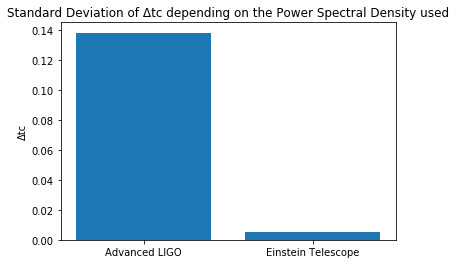

In [24]:
x = np.arange(2)
stdev = [0.138274514802261, 0.00520548818394105]

fig, ax = plt.subplots()
#Labels the y-axis.
ax.set_ylabel('Δtc')
#Sets title of graph.
ax.set_title('Standard Deviation of Δtc depending on the Power Spectral Density used')
ax.set_xticks(x)
ax.set_xticklabels(stdev)
plt.bar(x, stdev)
plt.xticks(x, ('Advanced LIGO', 'Einstein Telescope'))
#Plots the graph.
plt.show()

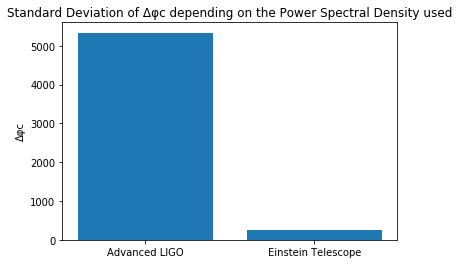

In [25]:
x = np.arange(2)
stdev = [5337.34701214792, 247.869715431811]

fig, ax = plt.subplots()
#Labels the y-axis.
ax.set_ylabel('Δφc')
#Sets title of graph.
ax.set_title('Standard Deviation of Δφc depending on the Power Spectral Density used')
ax.set_xticks(x)
ax.set_xticklabels(stdev)
plt.bar(x, stdev)
plt.xticks(x, ('Advanced LIGO', 'Einstein Telescope'))
#Plots the graph.
plt.show()

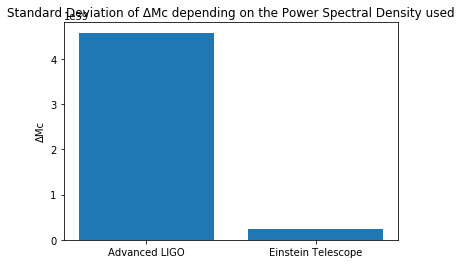

In [26]:
x = np.arange(2)
stdev = [4.58075391311705e+39, 2.30222266915638e+38]

fig, ax = plt.subplots()
#Labels the y-axis.
ax.set_ylabel('ΔMc')
#Sets title of graph.
ax.set_title('Standard Deviation of ΔMc depending on the Power Spectral Density used')
ax.set_xticks(x)
ax.set_xticklabels(stdev)
plt.bar(x, stdev)
plt.xticks(x, ('Advanced LIGO', 'Einstein Telescope'))
#Plots the graph.
plt.show()

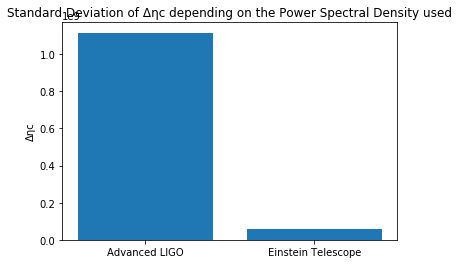

In [27]:
x = np.arange(2)
stdev = [1116003091.94917, 56089748.1446068]

fig, ax = plt.subplots()
#Labels the y-axis.
ax.set_ylabel('Δηc')
#Sets title of graph.
ax.set_title('Standard Deviation of Δηc depending on the Power Spectral Density used')
ax.set_xticks(x)
ax.set_xticklabels(stdev)
plt.bar(x, stdev)
plt.xticks(x, ('Advanced LIGO', 'Einstein Telescope'))
#Plots the graph.
plt.show()

As it can be observed from the following graphs, the Standard Deviation seems to be much bigger when the AdvancedLIGO is used compared to when the Einstein Telescope is used.